<h3>Regression Analysis

In [312]:
#Import packages into python 
import pandas as pd   # data science essentials
import matplotlib.pyplot as plt  # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np#importing numpy
import sklearn #importing sklearn
import statsmodels.formula.api as smf #importing the stats models
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression #regression creator

# New libraries
from sklearn.neighbors import KNeighborsRegressor # KNN Regression importer
from sklearn.preprocessing import StandardScaler # standard scaler

#specifying the file name onto python 
file = 'birthweight_low.xlsx'

# reading the file into Python
birthweight = pd.read_excel(io = file,
                            usecols ='A:R')
# outputting the dataset
#birthweight.head()


<h3>Initial Exploration of the birth-weight dataset 

First it is important to find the number of observations and features that are in this dataset. 

In [313]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [314]:
# looping to print column names one by one
#for column in birthweight:
#    print(column)

In [315]:
# descriptive statistics for numeric data
#birthweight.describe(include = 'number').round(2)

In [316]:
#birthweight.info()

This dataset contains a mix of data types that are float and int, however, the dataset is mostly integer. Next step is to  analyze this in more detail because it will affect the approach of building a machine learning model and predicting the birth-weight. 

<h3>Flagging the Missing Values

Working with Missing Values 

In [317]:
birthweight.isnull().sum(axis = 0) #this code will print the missing values in each cataegoty

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [318]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight[    ['m_meduc', 'm_npvis','m_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

Impute all other missing values in the dataset with zero for their respective columns.

In [319]:
# imputing everything else with the mean 

# meduc
fill = 13.91
birthweight['meduc'] = birthweight['meduc'].fillna(fill)


# npvis 
fill = 11.60
birthweight['npvis'] = birthweight['npvis'].fillna(fill)


# feduc
fill = 13.85
birthweight['feduc'] = birthweight['feduc'].fillna(fill)



<h4>Histogram to Analyize Y-Variable Distribution
    
The Y-variable ( bwght ) is an integer as it does not contain decimal places. Birth-weight is initially recorded in grams which is very common. From here this informs that the modeling might be flawed. The prediction made might not be perfect, however, there will be an understanding of which features affect birth weight of a baby. 

Question: What is the birth-weight of a baby?

Response: It depends on the features of the baby.

<h4>The distribution of the birth-weight is negatively skewed. Creating a histogram and adapt the base model using the new variable created from the logarithmic transformation.

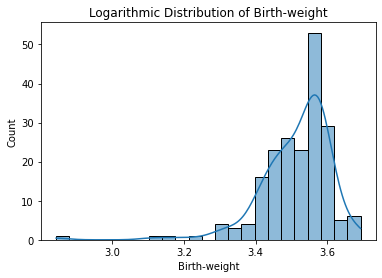

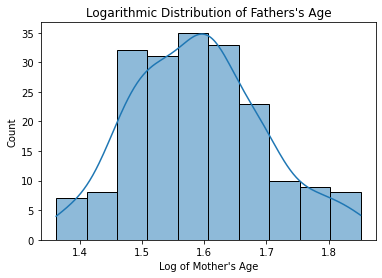

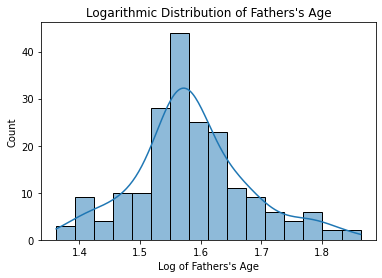

In [320]:
# log transforming birthweight and saving it to the dataset
birthweight['log_bwght'] = np.log10(birthweight['bwght'])
# creating a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_bwght',
             kde    = True)


# the title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth-weight")
plt.xlabel(xlabel = "Birth-weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


# log transforming birthweight and saving it to the dataset
birthweight['log_mage'] = np.log10(birthweight['mage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Fathers's Age")
plt.xlabel(xlabel = "Log of Mother's Age") #dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming birthweight and saving it to the dataset
birthweight['log_fage'] = np.log10(birthweight['fage'])

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_fage',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Fathers's Age")
plt.xlabel(xlabel = "Log of Fathers's Age") #dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


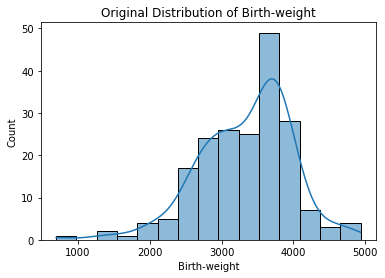

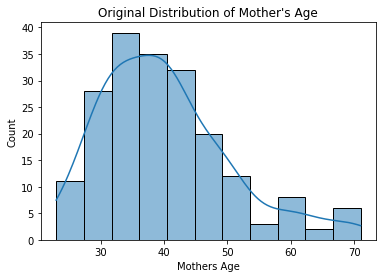

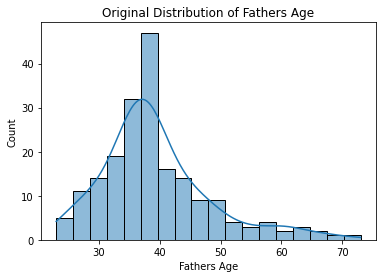

In [321]:
# creating a histogram using HISTPLOT to analyize y-variable 
sns.histplot(data   = birthweight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth-weight")
plt.xlabel(xlabel = "Birth-weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# creating a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mother's Age")
plt.xlabel(xlabel = "Mothers Age") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()




# creating a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'fage',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Fathers Age")
plt.xlabel(xlabel = "Fathers Age") #dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()






In [322]:
# creating a list of continuous features (including bwight)
continuous_data = ['bwght','mage','fage']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwight
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
fage    -0.40
mage    -0.46
Name: bwght, dtype: float64

<h3> Feature Engineering - Combining Features <br> 

Research on women in their pregnancy regarding their number of visits, alcohol and cigarettes use. Research also shows that six different countries show that birth-weight is significantly impacted by the number of prenatal visits that have occurred during pregnancy.

Citation 
Donaldson, P. J., & John O. G. Billy. (1984). The Impact of Prenatal Care on Birth Weight: Evidence from an International Data Set. Medical Care, 22(2), 177–188. http://www.jstor.org/stable/3765091 

O'Brien, P. (2007, October 27). Is it all right for women to drink small amounts of alcohol in pregnancy? . US National Library of Medicine  National Institutes of Health. Retrieved November 23, 2021, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2043426/. 

I designed all the features below for the x-variables, however, not all of these will be include on last model. There will be selected when created the different regression models. 


In [323]:
#Feature engineering
#New columns based of mothers education and mothers age
 
#Here looking into the prenatal visits and connection with the mothers age and education 
birthweight['preNatal_age']= birthweight['npvis']+(birthweight['mage']/2) 
birthweight['preNatal_edu']= birthweight['npvis']+(birthweight['meduc']/2)

#Here looking into the monthly prenatal visits and connection with the mothers age and education 
birthweight['monpre_age']= birthweight['monpre']+(birthweight['mage']/2)
birthweight['monpre_edu']= birthweight['monpre']+(birthweight['meduc']/2)

#Here looking into the use of drink and cigs and connection with the mothers education 
birthweight['drink_medu']= birthweight['drink']+(birthweight['meduc']/2)
birthweight['cigs_medu']= birthweight['cigs']+(birthweight['meduc']/2)



In [324]:
#Tried Using the base 10 log of number of prenatal visits and mothers age / education 
birthweight['log_preNatal_age']= np.log10(birthweight['npvis']/birthweight['mage'])
birthweight['preNatal_edu']= np.log10(birthweight['npvis']/birthweight['meduc'])

#Tried Using the base 10 log of monthly prenatal visits and mothers age / education 
birthweight['Log_monpre_age']= np.log10(birthweight['monpre']/birthweight['mage'])
birthweight['log_monpre_edu']= np.log10(birthweight['monpre']/birthweight['meduc'])


Text(0, 0.5, 'Birth-weight')

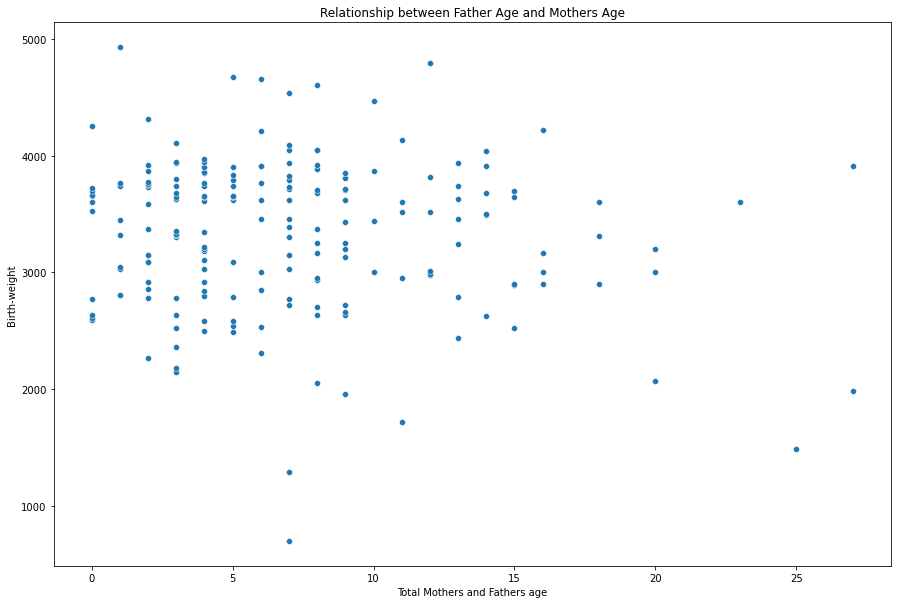

In [325]:
# total education (tried combining to work with the ages of mother and father)
birthweight['Total_fmage'] = abs(birthweight['fage'] - (birthweight['mage']))


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot 
sns.scatterplot(x    = 'Total_fmage',
            y    = 'bwght',
            data = birthweight)



# titles and labels
plt.title(label   = 'Relationship between Father Age and Mothers Age')
plt.xlabel(xlabel = 'Total Mothers and Fathers age')
plt.ylabel(ylabel = 'Birth-weight')

#this will show how the combination of the two ages looks on the scatter plot gragh 

<h3>Training the Testing Data 

In [326]:
# creating a (Pearson) correlation matrix
birthweight_corr = birthweight.corr().round(2)


# printing (Pearson) correlations with birthweight
print(birthweight_corr.loc['bwght'].sort_values(ascending = False))

bwght               1.00
log_bwght           0.97
log_preNatal_age    0.34
omaps               0.25
fmaps               0.25
Log_monpre_age      0.14
mblck               0.13
feduc               0.13
preNatal_edu        0.12
fblck               0.12
male                0.11
meduc               0.09
npvis               0.06
m_npvis             0.06
monpre_edu          0.02
m_feduc            -0.00
moth               -0.02
fwhte              -0.04
monpre             -0.05
log_monpre_edu     -0.07
foth               -0.08
Total_fmage        -0.11
mwhte              -0.11
m_meduc            -0.13
preNatal_age       -0.33
log_fage           -0.38
fage               -0.40
log_mage           -0.42
monpre_age         -0.44
mage               -0.46
cigs_medu          -0.54
cigs               -0.57
drink_medu         -0.69
drink              -0.74
Name: bwght, dtype: float64


In [327]:
# building a full model to identify the siginificant variables 

# blueprinting a model type
lm_full = smf.ols(formula = """ bwght ~                                             
meduc+
fage+
cigs+
drink
""",
                                data = birthweight)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.80e-48
Time:                        15:17:29   Log-Likelihood:                -1430.3
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     191   BIC:                             2887.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4513.8772    220.025     20.515      0.000    4079.887    4947.868
meduc         25.0738     12.890      1.945      0.053      -0.351      50.499
fage         -11.8468      3.032     -3.907      0.000     -17.828      -5.866
cigs         -37.1963      4.608     -8.072      0.000     -46.286     -28.107
drink       -121.6462      9.588    -12.688      0.000    -140.557    -102.735
==============================================================================
Omnibus:                        8.592   Durbin-Watson:                   1.287
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               15.432
Skew:                          -0.133   Prob(JB):                     0.000446
Kurtosis:                       4.349   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
#X variable for regression
x_variables = ['meduc','fage','cigs','drink']


# Preparing a DataFrame based the the analysis above
data   = birthweight.loc[ : , x_variables]


# Preparing the target variable
target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            data,     # x-variables
            target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            data,         # x-variables
            target,   # y-variable
            test_size = 0.25,
            random_state = 219)

<h4>OLS Regression Model

In [329]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.685
OLS Testing Score  : 0.7133
OLS Train-Test Gap : 0.0283


<h4>Lasso Regression Model

In [330]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.684
Lasso Testing Score  : 0.7208
Lasso Train-Test Gap : 0.0368


<h4>ARD Regression Model

In [331]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6843
Testing Score : 0.7215
ARD Train-Test Gap : 0.0372


<h4>KNN Regression Model

In [332]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(birthweight)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(birthweight)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


In [333]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_OLS, y_train_OLS)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_OLS, y_train_OLS))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_OLS, y_test_OLS))


In [334]:
#finding the number of neighbors 
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 7


In [335]:
# installing a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 7)


# fitting to the training data
knn_fit = knn_reg.fit(x_train_OLS, y_train_OLS)


# predicting on new data
knn_reg_pred = knn_fit.predict(x_test_OLS)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_OLS, y_train_OLS).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_OLS, y_train_OLS).round(4)
knn_reg_score_test  = knn_reg.score(x_test_OLS, y_test_OLS).round(4)


# Displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.675
KNN Testing Score : 0.6096
KNN Train-Test Gap: 0.0654


<h4>Final Regression Scores for comparison 

In [336]:
# comparing results
print(f"""
Model      Train Score      Test Score     Test Gap 
-----      -----------      ----------     ----------
OLS        {lr_train_score}          {lr_test_score}            {lr_test_gap}
Lasso      {lasso_train_score}          {lasso_test_score}            {lasso_test_gap}
* ARD      {ard_train_score}         {ard_test_score}            {ard_test_gap}
KNN        {knn_reg_score_train}          {knn_reg_score_test}            {knn_reg_test_gap}

""")



Model      Train Score      Test Score     Test Gap 
-----      -----------      ----------     ----------
OLS        0.685          0.7133            0.0283
Lasso      0.684          0.7208            0.0368
* ARD      0.6843         0.7215            0.0372
KNN        0.675          0.6096            0.0654




* Final Model 